In [160]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

In [161]:
# Download stock data for Visa Inc. (V)
ticker = 'V'
start_date = '2005-01-01'
end_date = '2020-01-01'
data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")


[*********************100%***********************]  1 of 1 completed


In [162]:
# Save the data to a CSV file

# filename = f'{ticker}_{start_date}_{end_date}.csv'
# df.to_csv(filename)

In [163]:
data = data[['Close']]
data = data.dropna()
data = data['Close'].resample('MS', label='left').mean()

Plotting the data

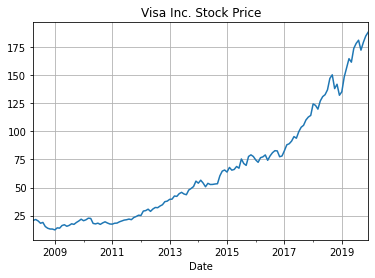

In [164]:
data.plot(title='Visa Inc. Stock Price')
plt.grid()

Splitting the data into training and test sets

In [169]:
train_size = int(len(data) * 0.80)
train_data = data[:train_size+1]
test_data = data[train_size:]
test_size = len(test_data)

In [170]:
print(train_size)
print(test_size)

112
29


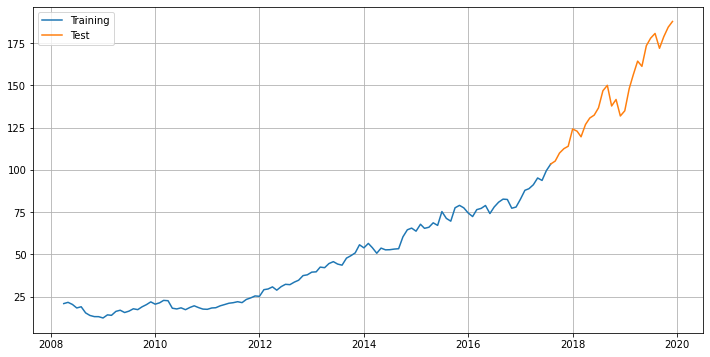

In [171]:
# Plot the training and test sets
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Test')
plt.legend()
plt.grid()


ADF Statistic: 1.341502
p-value: 0.996831
All adfuller values: (1.3415017557702167, 0.9968314923273447, 13, 98, {'1%': -3.4989097606014496, '5%': -2.891516256916761, '10%': -2.5827604414827157}, 456.32440890347556)


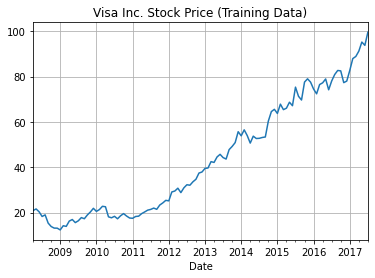

In [46]:
# Augmented Dickey-Fuller test
result = adfuller(train_data)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('All adfuller values:', result)
train_data.plot(title='Visa Inc. Stock Price (Training Data)')
plt.grid()

Plotting PACF (Partial Autocorrelation Function) and ACF (Autocorrelation Function)

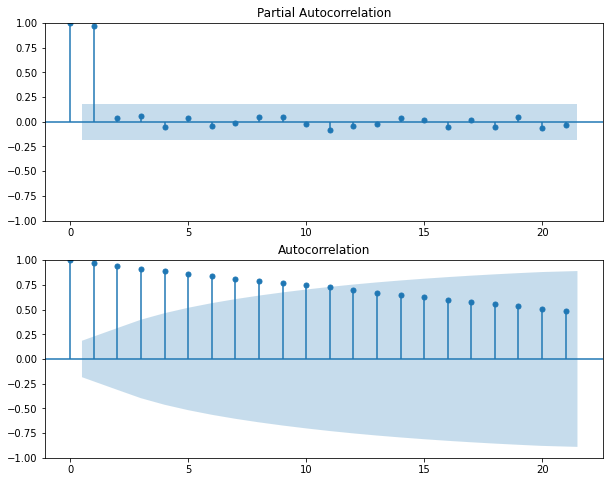

In [172]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_pacf(train_data, ax=ax1, method='ywm')
plot_acf(train_data, ax=ax2)
plt.show()

Difference the data for stationarity

ADF Statistic: -8.054277
p-value: 0.000000
All adfuller values: (-8.054277107092624, 1.7090938447827709e-12, 1, 110, {'1%': -3.4912451337340342, '5%': -2.8881954545454547, '10%': -2.5809876033057852}, 459.21736516980513)


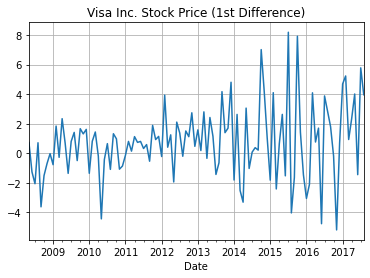

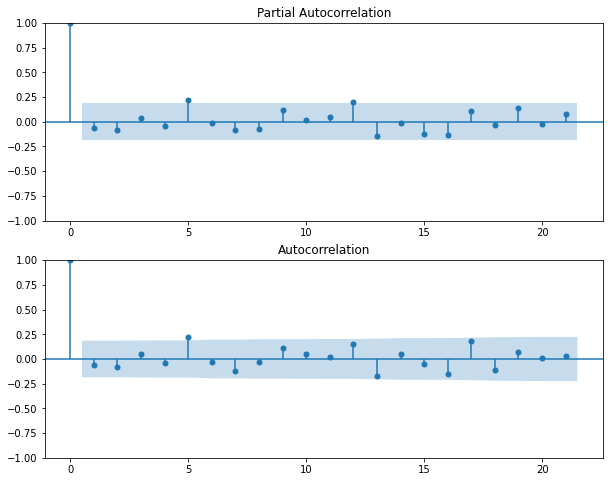

In [173]:
# Difference the data
train_data_diff = train_data.diff().dropna()
train_data_diff.plot(title='Visa Inc. Stock Price (1st Difference)')
plt.grid()

# Augmented Dickey-Fuller test on differenced data
result_diff = adfuller(train_data_diff)
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('All adfuller values:', result_diff)


# Plot the ACF and PACF of the differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_pacf(train_data_diff, ax=ax1, method='ywm')
plot_acf(train_data_diff, ax=ax2)
plt.show()

ADF Statistic: -6.638169
p-value: 0.000000
All values: (-6.638168909990953, 5.495061391135408e-09, 10, 100, {'1%': -3.497501033, '5%': -2.89090644, '10%': -2.5824349}, 458.833885600966)


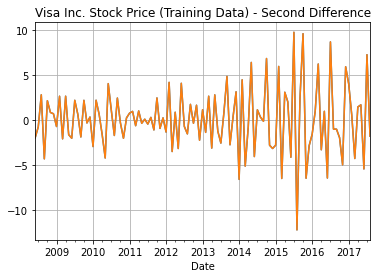

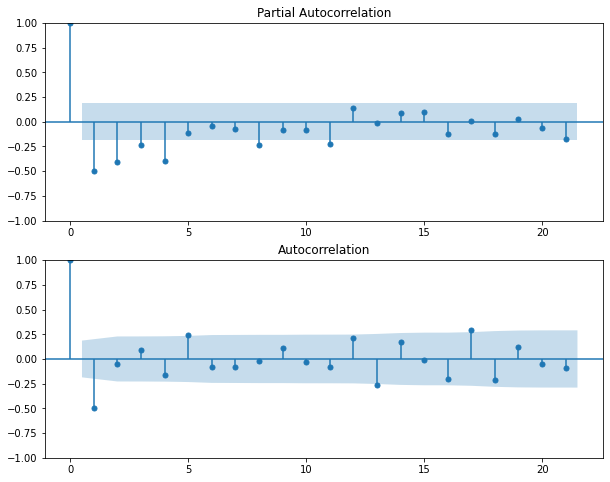

In [174]:
# Difference the data again
train_data_diff2 = train_data_diff.diff().dropna()
train_data_diff2.plot(title='Visa Inc. Stock Price (Training Data) - Second Difference')

# Augmented Dickey-Fuller test on second differenced data
result_diff2 = adfuller(train_data_diff2)
print('ADF Statistic: %f' % result_diff2[0])
print('p-value: %f' % result_diff2[1])
print('All values:', result_diff2)
train_data_diff2.plot(title='Visa Inc. Stock Price (Training Data) - Second Difference')
plt.grid()

# PACF and ACF plots on second differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_pacf(train_data_diff2, ax=ax1, method='ywm')
plot_acf(train_data_diff2, ax=ax2)
plt.show()

In [175]:
model_fit = ARIMA(train_data, order=(5, 1, 4)).fit()
model_fit.summary()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  113
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -253.173
Date:                Wed, 19 Apr 2023   AIC                            526.347
Time:                        20:29:53   BIC                            553.532
Sample:                    04-01-2008   HQIC                           537.376
                         - 08-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2878      0.308     -0.934      0.350      -0.892       0.316
ar.L2         -0.2144      0.141     -1.524      0.127      -0.490       0.061
ar.L3          0.7380      0.097      7.583      0.000       0.547       0.929
ar.L4          0.4895      0.297      1.649      0.099      -0.092       1.071
ar.L5          0.2441      0.096      2.542      0.011       0.056       0.432
ma.L1          0.2654      0.303      0.877      0.380      -0.328       0.858
ma.L2          0.1979      0.151      1.311      0.190      -0.098       0.494
ma.L3         -0.6897      0.151     -4.573      0.000      -0.985      -0.394
ma.L4         -0.5437      0.309     -1.757      0.079      -1.150       0.063
sigma2         5.2320      0.777      6.735      0.000       3.709       6.755
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 0.63
Prob(Q):                              0.67   Prob(JB):                         0.73
Heteroskedasticity (H):               3.96   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Looking at the forecast of the training data, we can see that the model learns quite well

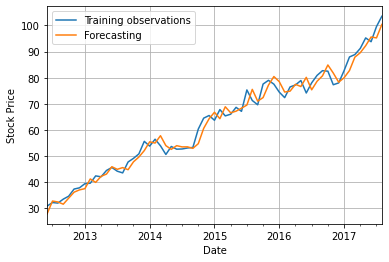

In [197]:
train_data.iloc[50:].plot(label='Training observations')
model_fit.predict(start=50, end=train_size).plot(label='Forecasting')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

Plotting training observations, forecasting test observations

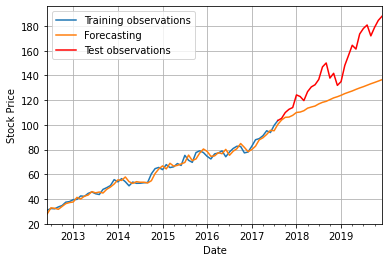

In [194]:
# Plot Training observations up until first forecasted, then plot the forecasted values, also plot the test data
train_data.iloc[50:].plot(label='Training observations')
model_fit.predict(start=50, end=train_size+test_size-1).plot(label='Forecasting')
test_data.plot(label='Test observations', color='red')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()

Zoomed in view of the forecast, to see how the model performs on the test data

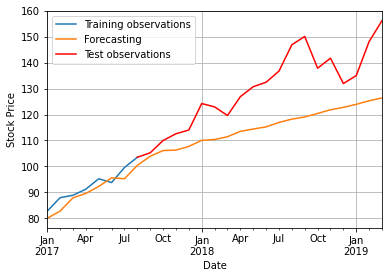

In [195]:
train_data.iloc[105:].plot(label='Training observations')
model_fit.predict(start=105, end=train_size+test_size-10).plot(label='Forecasting')
test_data.iloc[:-9].plot(label='Test observations', color='red')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()